In [75]:
from google.colab import drive
import os
# Mount Google Drive
#drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/LEARN/Finance/quantitative finance/Portfolio-optimization')
print(os.getcwd())

/content/drive/My Drive/LEARN/Finance/quantitative finance/Portfolio-optimization


# INITIALIZATION (SQL database) - LOG RETURN INDICES - multivariate fitting

2025-07-31 21:09:48,822 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2025-07-31 21:09:48,823 INFO sqlalchemy.engine.Engine 
                        SELECT Ticker, Date, Close
                        FROM stock_data
                        ORDER BY Ticker, Date
                


INFO:sqlalchemy.engine.Engine:
                        SELECT Ticker, Date, Close
                        FROM stock_data
                        ORDER BY Ticker, Date
                


2025-07-31 21:09:48,825 INFO sqlalchemy.engine.Engine [generated in 0.00269s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.00269s] ()


2025-07-31 21:09:49,577 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


2025-07-31 21:09:49,947 INFO sqlalchemy.engine.Engine BEGIN (implicit)


/tmp/ipython-input-1434605962.py:130: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result.mask(result < 1e-10, 1e-10)
INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2025-07-31 21:09:49,948 INFO sqlalchemy.engine.Engine 
                        SELECT Ticker, Date, Close
                        FROM stock_data
                        ORDER BY Ticker, Date
                


INFO:sqlalchemy.engine.Engine:
                        SELECT Ticker, Date, Close
                        FROM stock_data
                        ORDER BY Ticker, Date
                


2025-07-31 21:09:49,949 INFO sqlalchemy.engine.Engine [generated in 0.00241s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.00241s] ()


2025-07-31 21:09:50,583 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK
/tmp/ipython-input-1434605962.py:130: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result.mask(result < 1e-10, 1e-10)


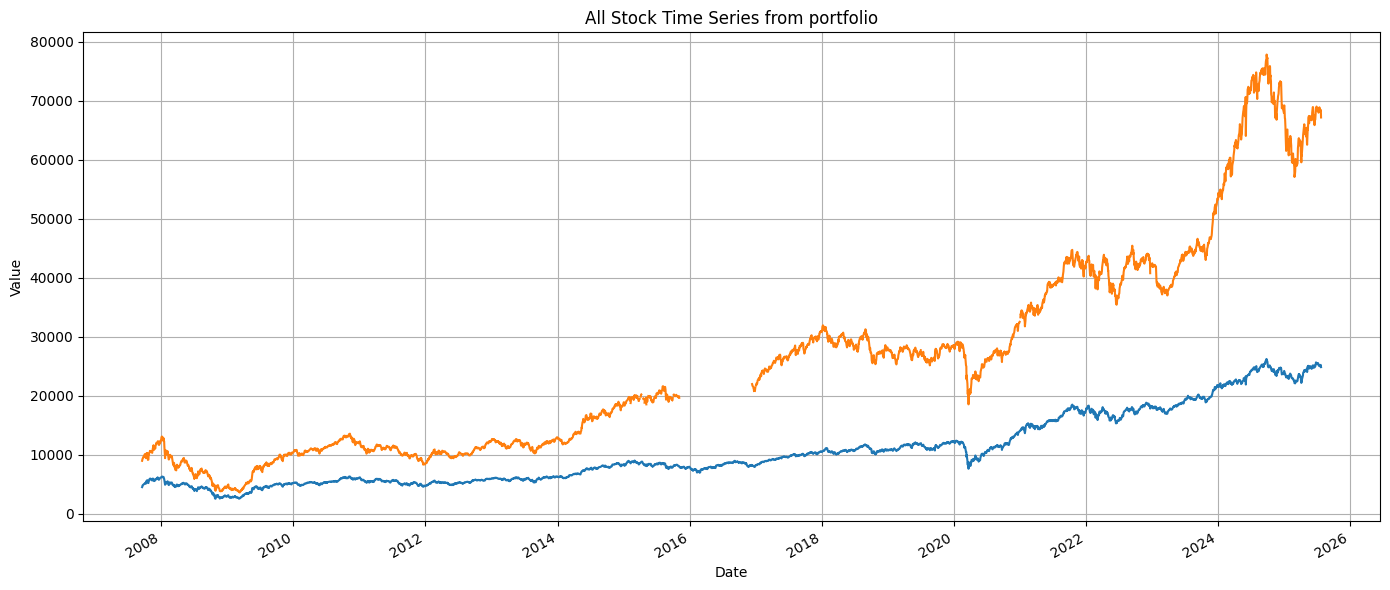

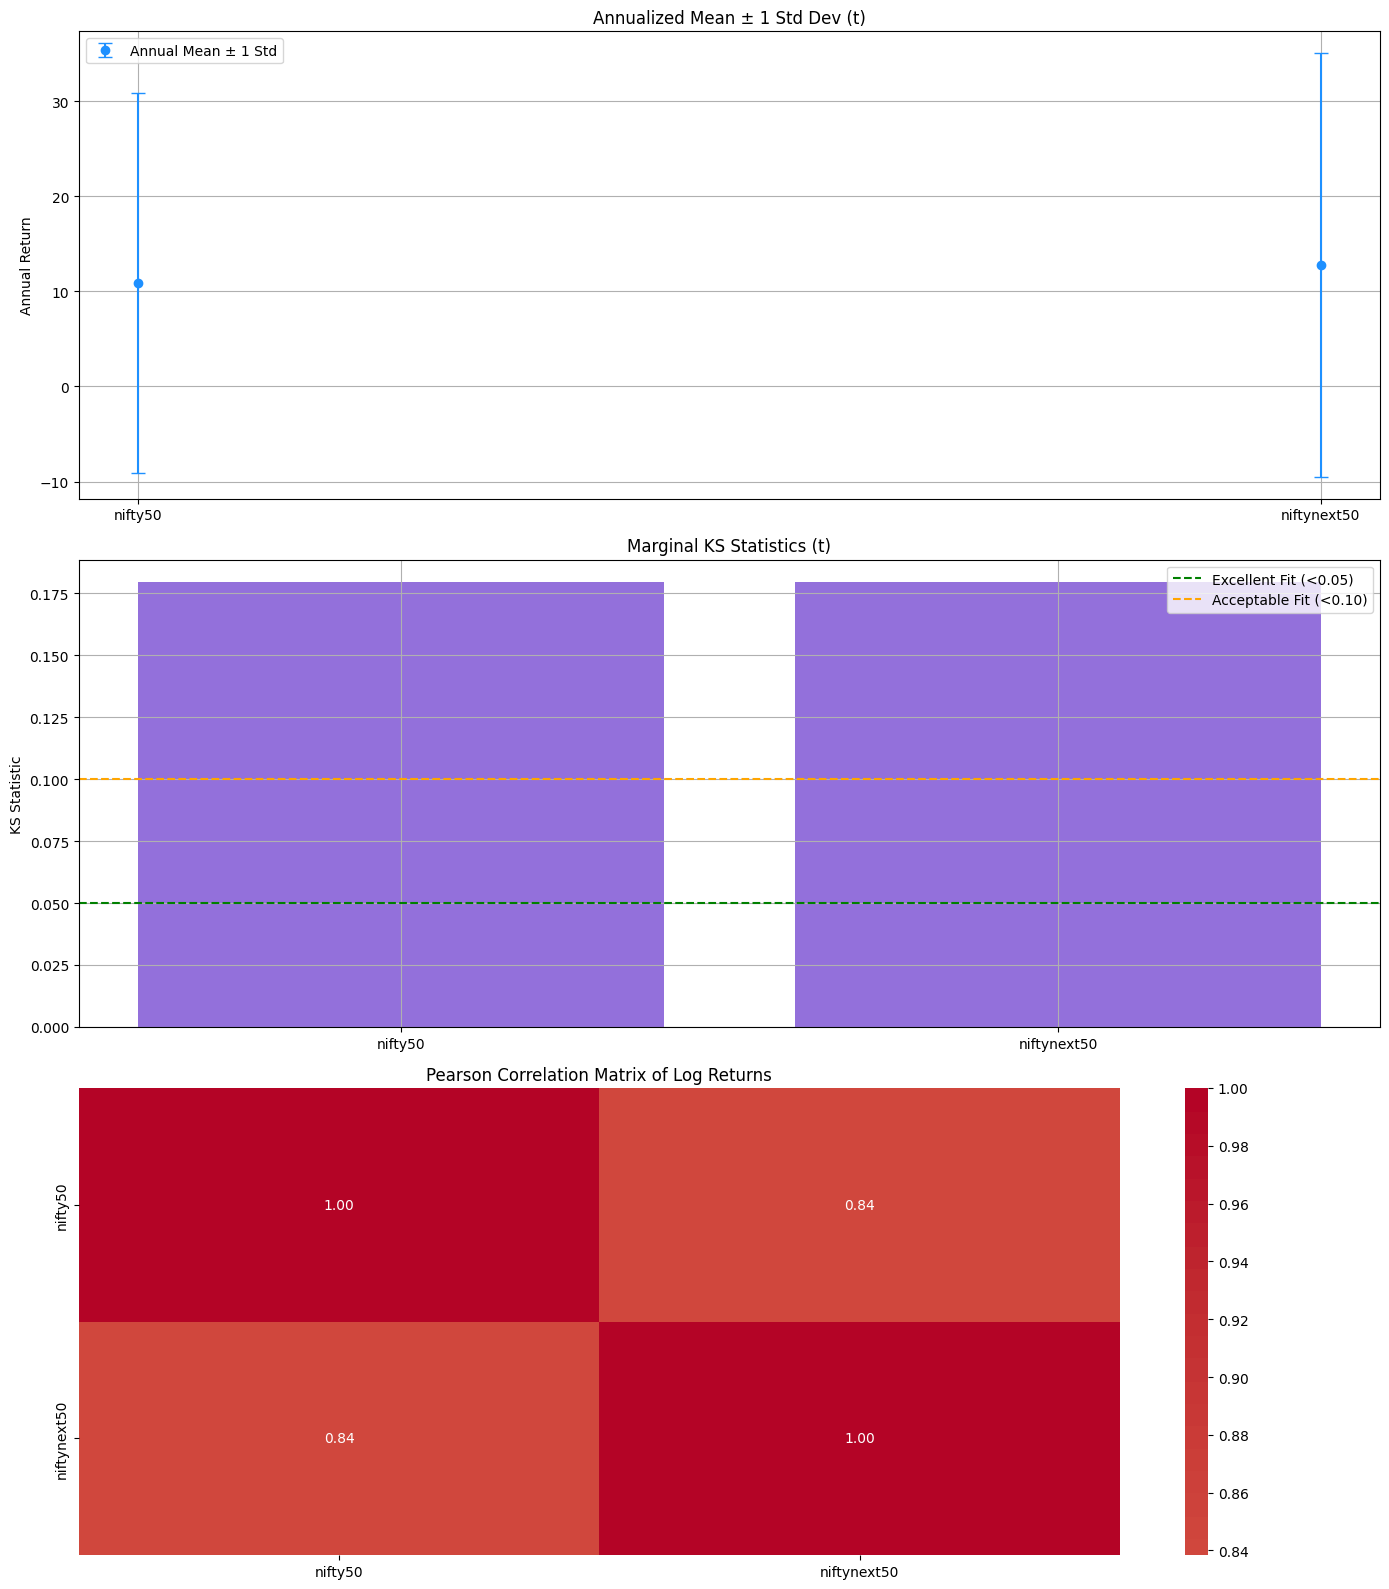

    Index Column Name
0       0    ADANIENT
1       1  ADANIPORTS
2       2  APOLLOHOSP
3       3  ASIANPAINT
4       4    AXISBANK
5       5  BAJAJ-AUTO
6       6  BAJAJFINSV
7       7  BAJFINANCE
8       8         BEL
9       9  BHARTIARTL
10     10       CIPLA
11     11   COALINDIA
12     12     DRREDDY
13     13   EICHERMOT
14     14      GRASIM
15     15     HCLTECH
16     16    HDFCBANK
17     17    HDFCLIFE
18     18  HEROMOTOCO
19     19    HINDALCO
20     20  HINDUNILVR
21     21   ICICIBANK
22     22  INDUSINDBK
23     23        INFY
24     24         ITC
25     25      JIOFIN
26     26    JSWSTEEL
27     27   KOTAKBANK
28     28          LT
29     29         M&M
30     30      MARUTI
31     31   NESTLEIND
32     32        NTPC
33     33        ONGC
34     34   POWERGRID
35     35    RELIANCE
36     36     SBILIFE
37     37        SBIN
38     38  SHRIRAMFIN
39     39   SUNPHARMA
40     40  TATACONSUM
41     41  TATAMOTORS
42     42   TATASTEEL
43     43         TCS
44     44 

In [76]:
#%run noise_types.ipynb
%run export_data_sql.ipynb
%run portfolio_analysis_fit.ipynb
%run portfolio_analysis_factors.ipynb
%run efficient_frontier.ipynb
%run portfolio_data_opt.ipynb

rfr = 0.05 # risk free rate
dist = 't' #option available = 'norm' , 't'
index_name = 'nifty50' #options available = 'nifty50, niftynext50'

PD = PortfolioData (rfr, dist, index_name)
asset_names = PD.get_data()
print (asset_names)

# LOG RETURN of portfolio: mu, sigma, (or df) from multivariate fitting

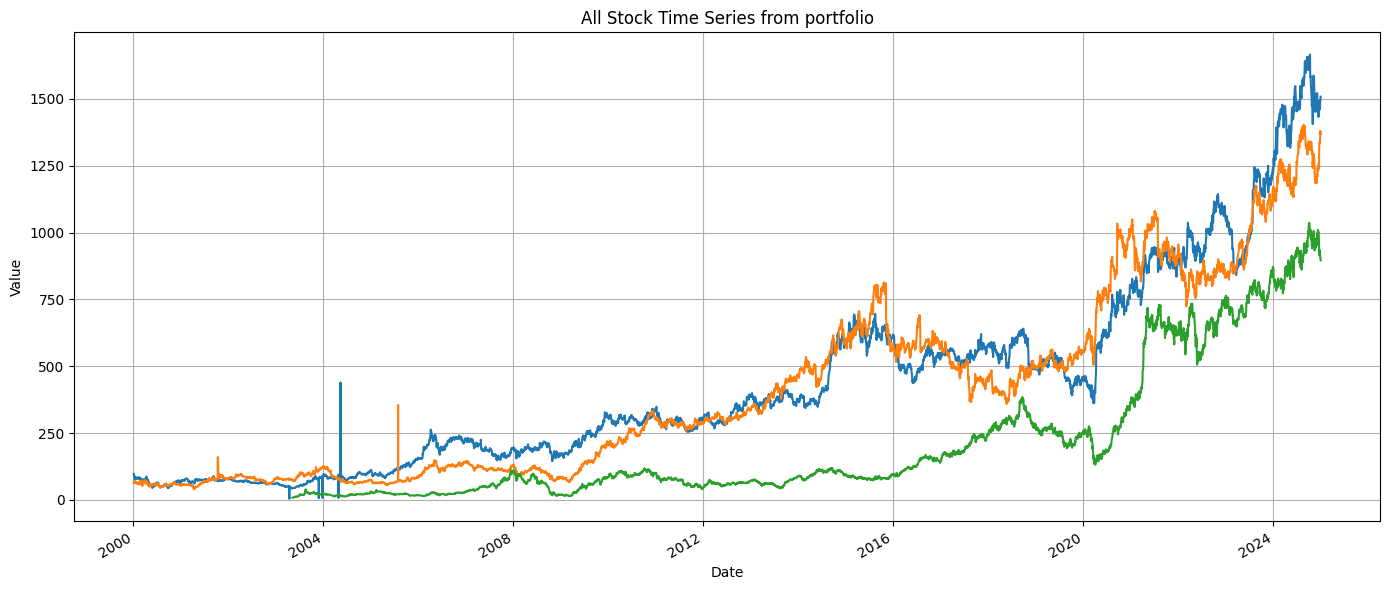

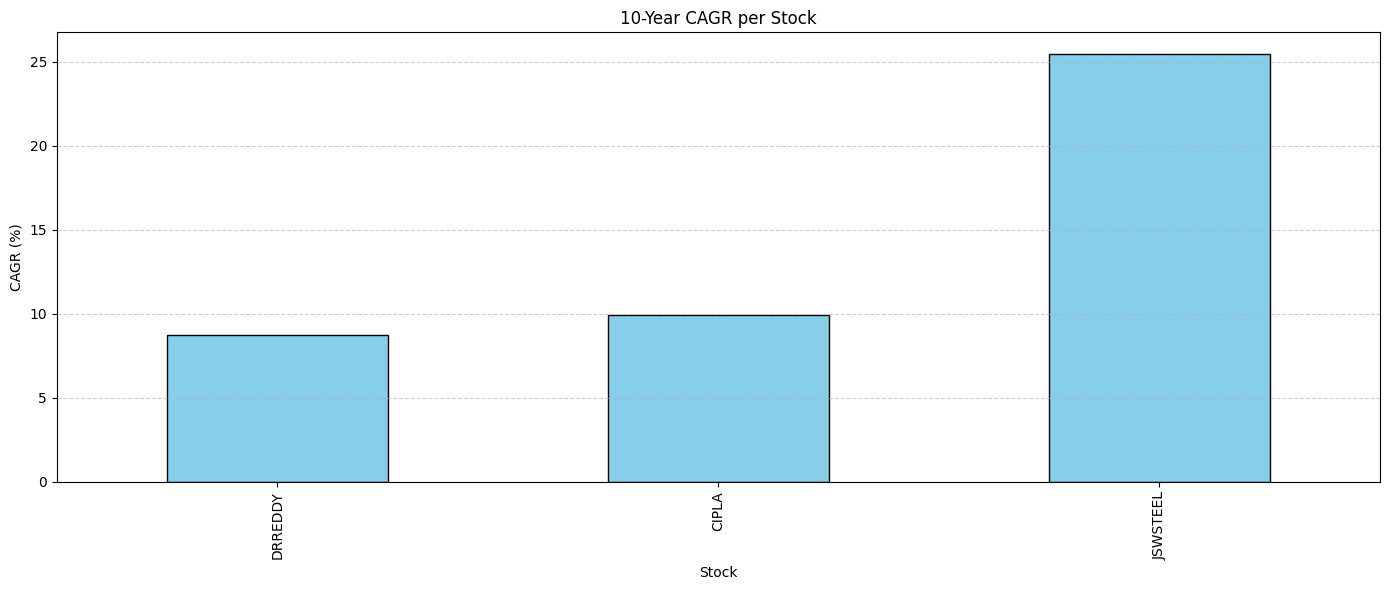

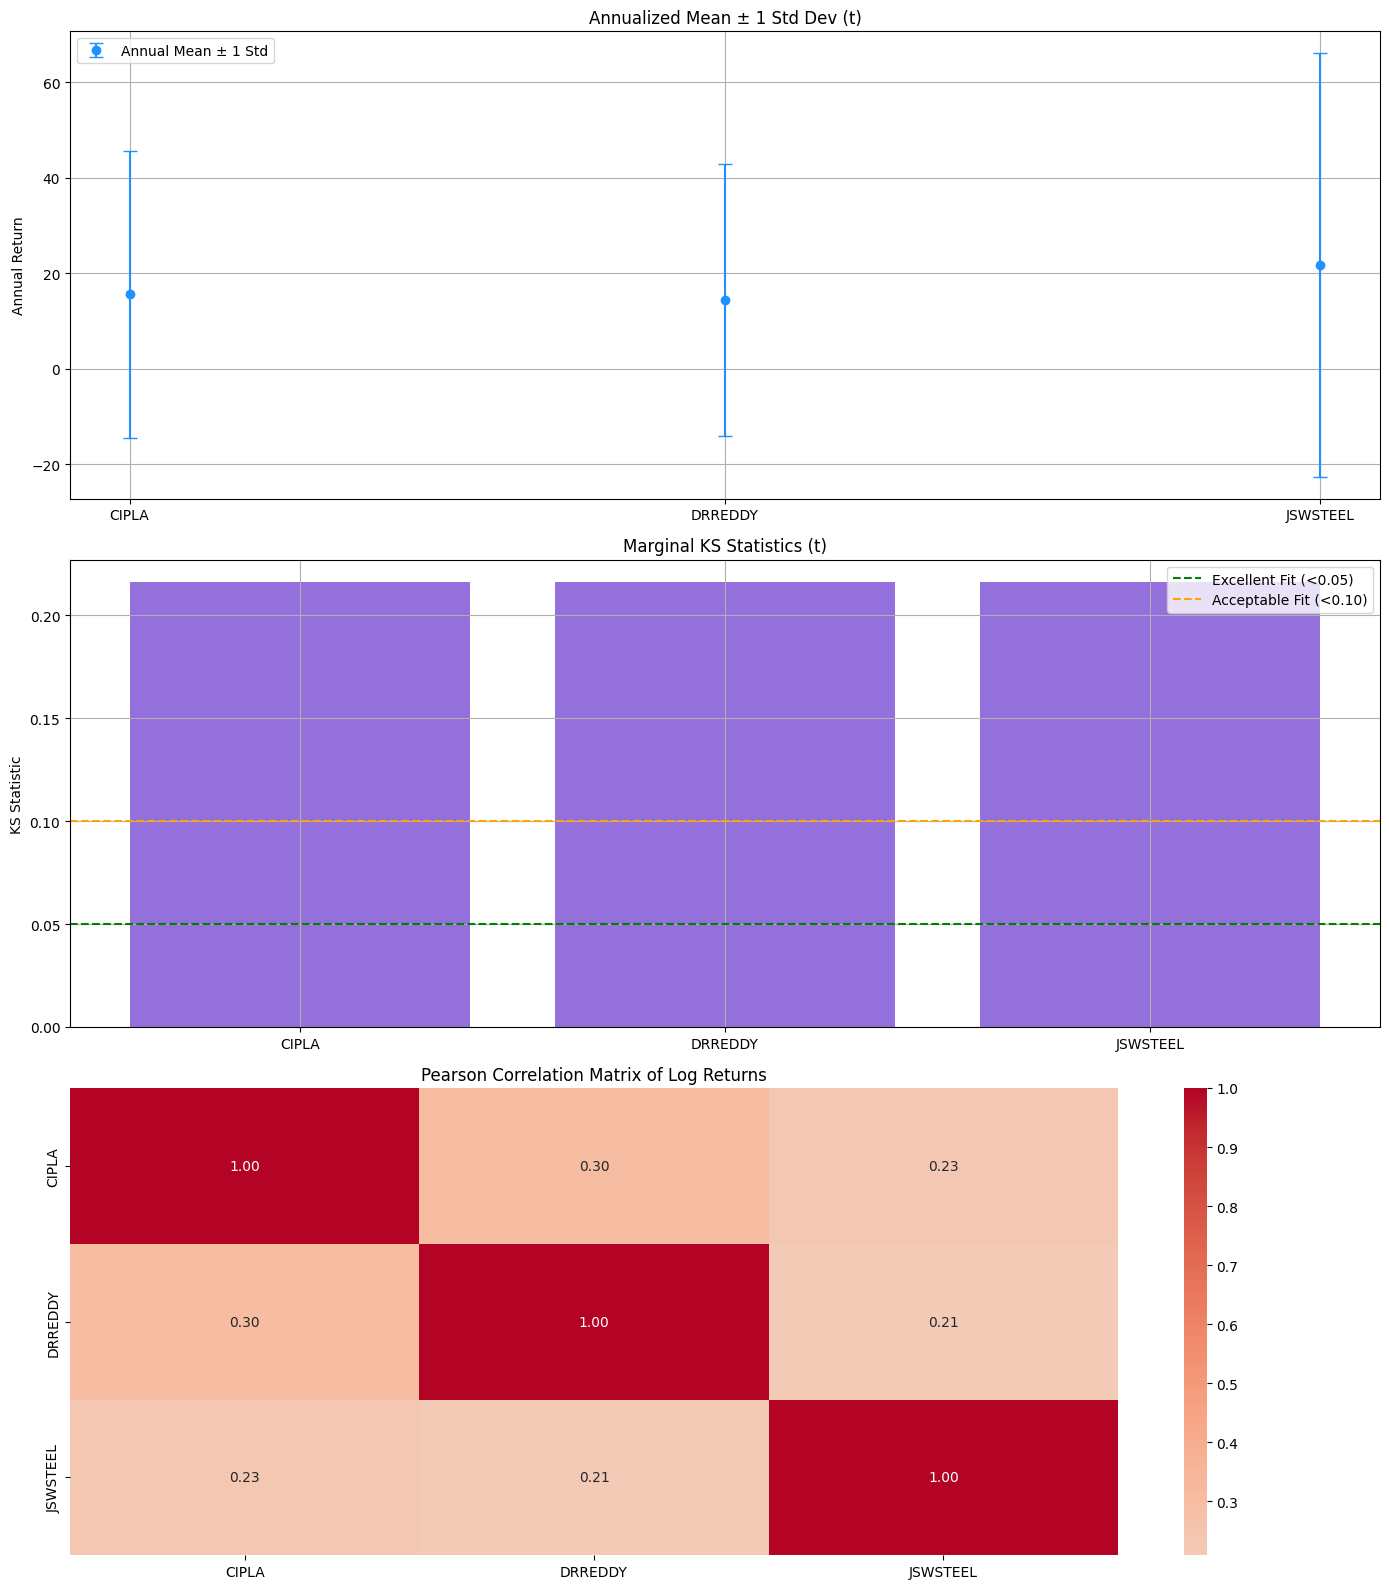

In [77]:
#customize portfolio of the chosen index from the output above
col = [10 , 12, 26]
PD.logreturn_portfolio(col)


# PORTFOLIO OPTIMIZATION (Lagrange): RISK FREE + N RISKY ASSESTS

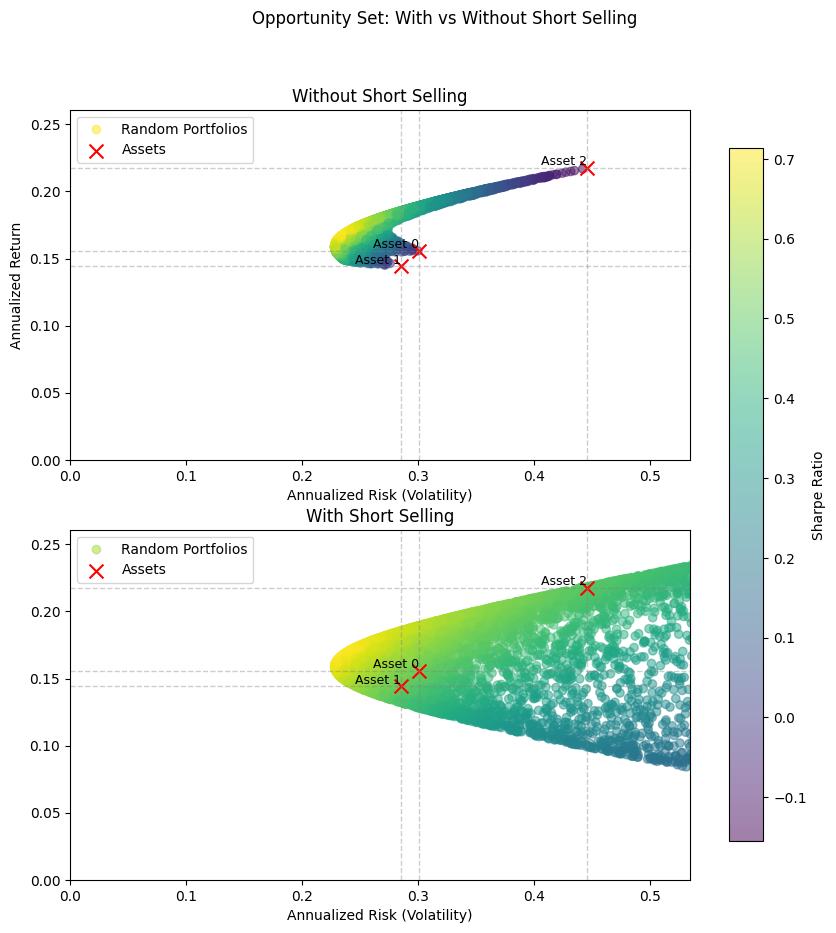

Efficient Frontier Computed.
from 100% risky portfolio on CML [0.35760363 0.34662661 0.30387629]
from maximizing sharpe ratio (adjusted return) of risky assests - excess return / risk [0.35480535 0.34402152 0.30151506]
sum = [0.35480535 0.69882687 1.00034192]


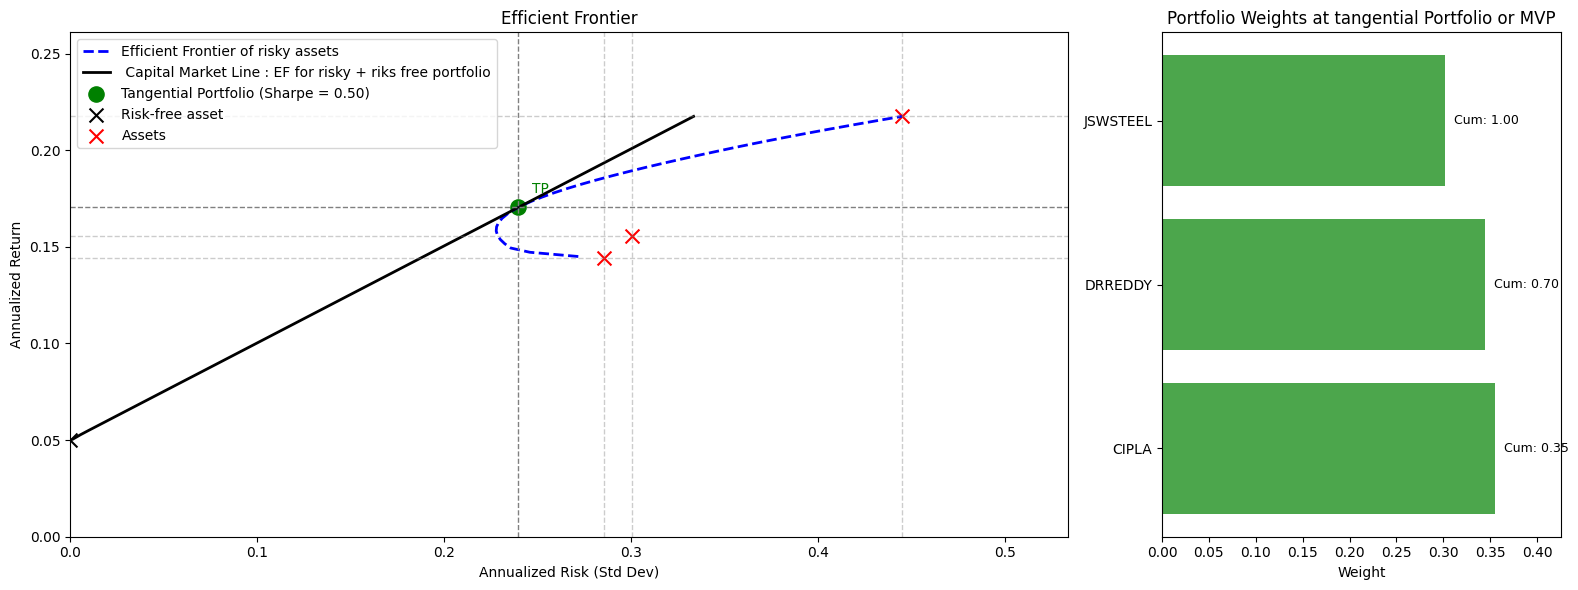

In [78]:
PD.MPT('cml') # option available = 'minvar' , 'maxret' , 'cml'

# FACTOR MODELS - param estimation from marginal distribution

In [79]:
PD.Factor('CAPM', 'OLS')
# options available = 'CAPM' - 'OLS', 'CAPM' - 'GLS'

--- CIPLA ---
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     728.3
Date:                Thu, 31 Jul 2025   Prob (F-statistic):          3.73e-148
Time:                        21:09:56   Log-Likelihood:                 11500.
No. Observations:                4236   AIC:                        -2.300e+04
Df Residuals:                    4234   BIC:                        -2.298e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      